In [1]:
import numpy as np
import matplotlib.pyplot as plt
from system import System
from algo import Algo
from tools import repeat_exp, repeat_exp_real_data, repeat_exp_real_data_oto
from tqdm import tqdm

In [2]:
import img2pdf


In [3]:
import pandas as pd

In [4]:
reward_table =pd.read_csv("data/reward_table.csv")
offline_data =np.array(pd.read_csv("data/offline_data.csv"))[:,1]


In [5]:
my_n_exp=200

In [6]:
reward_table.columns

Index(['Unnamed: 0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5',
       'pred_6', 'pred_7', 'pred_best'],
      dtype='object')

In [7]:
reward_table_bad = np.array(reward_table[["pred_1","pred_2","pred_3","pred_4","pred_5","pred_6","pred_7"]])
reward_table_good = np.array(reward_table[["pred_1","pred_2","pred_3","pred_4","pred_5","pred_6","pred_best"]])

In [8]:
def plot_average_reward_confidence_interval(hist_list, label, color):
    hist_array = np.array(hist_list)  # Convert to NumPy array
    
    # Exclude the first column (iteration 0) and normalize by t (starting from 1)
    avg_reward_per_iteration = hist_array[:, 1:] / np.arange(1, hist_array.shape[1])  # Normalize by t, excluding iteration 0
    
    # Calculate the mean average reward per iteration up to time t
    mean_avg_reward = np.mean(avg_reward_per_iteration, axis=0)
    
    # Plot the mean average reward per iteration up to time t
    plt.plot(mean_avg_reward, color=color, label=label)
    
    # Calculate the standard deviation of the average reward per iteration up to time t
    std_avg_reward = np.std(avg_reward_per_iteration, axis=0)
    lower_bound = mean_avg_reward - 2 * std_avg_reward  # Lower bound of confidence interval
    upper_bound = mean_avg_reward + 2 * std_avg_reward  # Upper bound of confidence interval
    
    # Fill the confidence interval
    plt.fill_between(range(len(mean_avg_reward)), lower_bound, upper_bound, color=color, alpha=0.2)

    # Set y-axis range from 0.2 to 0.7
    plt.ylim(0.2, 0.5)



# Run the experiments

In [9]:
K=7
means = [0]*K
m=30000
T=3000
hist_UCB1,hist_OtO1,hist_LCB1=repeat_exp_real_data(K,m,T,means,0,reward_table_bad, offline_data,alpha=1.,n_exp=my_n_exp)

100%|█████████████████████████████████████████| 200/200 [00:07<00:00, 26.96it/s]


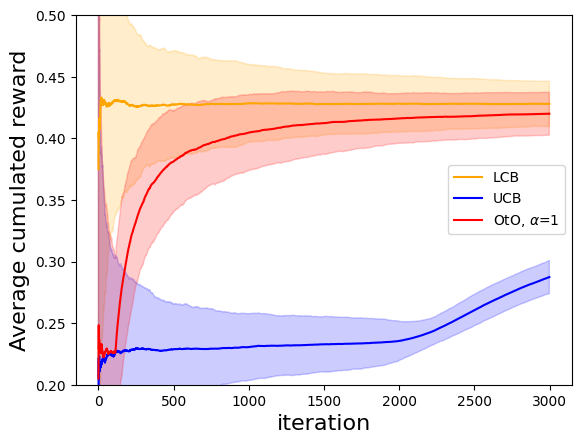

In [10]:
plot_average_reward_confidence_interval(hist_LCB1,color="orange", label="LCB")
plot_average_reward_confidence_interval(hist_UCB1,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO1,color="red", label="OtO, "r"$\alpha$=1")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=10000, m=10000, alpha =1.")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT1000alpha1.pdf', format='pdf')

# Show the plot
plt.show()

In [11]:
K=7
means = [0]*K
m=30000
T=300000
hist_UCB2,hist_OtO2,hist_LCB2=repeat_exp_real_data(K,m,T,means,0,reward_table_bad,offline_data,alpha=1.,n_exp=my_n_exp)

100%|█████████████████████████████████████████| 200/200 [12:03<00:00,  3.62s/it]


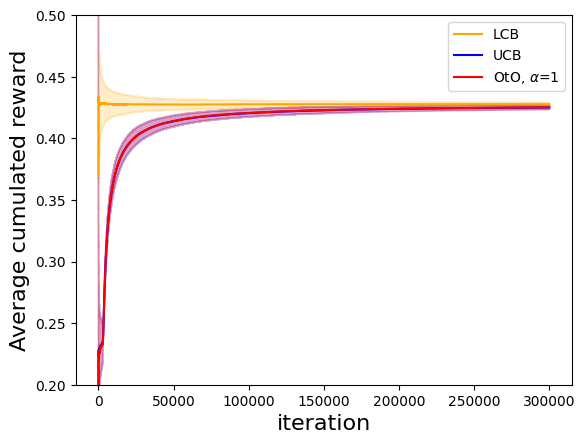

In [12]:
plot_average_reward_confidence_interval(hist_LCB2,color="orange", label="LCB")
plot_average_reward_confidence_interval(hist_UCB2,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO2,color="red", label="OtO, "r"$\alpha$=1")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=100000, m=10000, alpha=1.")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT100000alpha1.pdf', format='pdf')

# Show the plot
plt.show()

In [13]:
K=7
means = [0]*K
m=30000
T=3000
hist_UCB3=hist_UCB1
hist_LCB3 = hist_LCB1
hist_OtO3=repeat_exp_real_data_oto(K,m,T,means,0,reward_table_bad,offline_data,alpha=0.,n_exp=my_n_exp)

100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 77.21it/s]


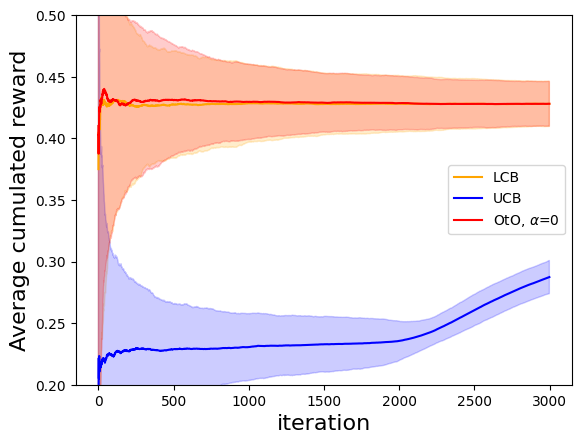

In [14]:
plot_average_reward_confidence_interval(hist_LCB3,color="orange", label="LCB")
plot_average_reward_confidence_interval(hist_UCB3,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO3,color="red", label="OtO, "r"$\alpha$=0")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=100000, m=10000, alpha=0")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT1000alpha0.pdf', format='pdf')

# Show the plot
plt.show()

In [15]:
K=7
means = [0]*K
m=30000
T=300000
hist_UCB4 = hist_UCB2
hist_LCB4 = hist_LCB2
hist_OtO4=repeat_exp_real_data_oto(K,m,T,means,0,reward_table_bad,offline_data, alpha=0.,n_exp=my_n_exp)

100%|█████████████████████████████████████████| 200/200 [04:54<00:00,  1.47s/it]


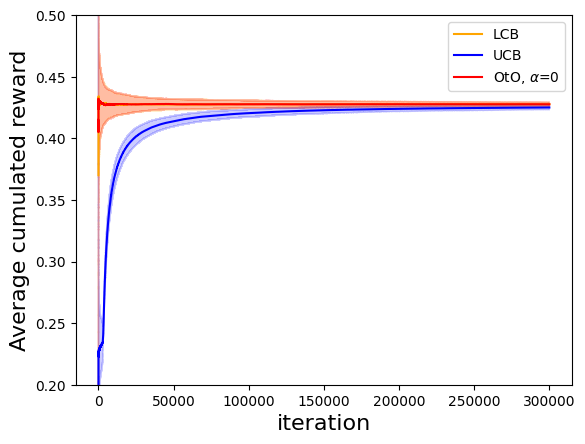

In [16]:
plot_average_reward_confidence_interval(hist_LCB4,color="orange", label="LCB")
plot_average_reward_confidence_interval(hist_UCB4,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO4,color="red", label="OtO, "r"$\alpha$=0")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=100000, m=10000, alpha=0")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT100000alpha0.pdf', format='pdf')

# Show the plot
plt.show()

In [17]:
K=7
means = [0]*K
m=30000
T=3000
hist_UCB5 = hist_UCB1
hist_LCB5 = hist_LCB1
hist_OtO5=repeat_exp_real_data_oto(K,m,T,means,0,reward_table_bad, offline_data,alpha=5.,n_exp=my_n_exp)


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 77.43it/s]


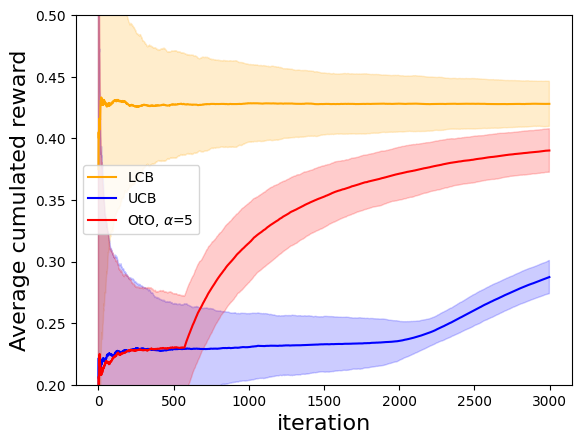

In [18]:
plot_average_reward_confidence_interval(hist_LCB5,color="Orange", label="LCB")
plot_average_reward_confidence_interval(hist_UCB5,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO5,color="red", label="OtO, "r"$\alpha$=5")
plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=10000, m=10000, alpha=2.5")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT1000alpha5.pdf', format='pdf')

# Show the plot
plt.show()

In [19]:
K=7
means = [0]*K
m=30000
T=300000
hist_UCB6 = hist_UCB2
hist_LCB6 = hist_LCB2
hist_OtO6=repeat_exp_real_data_oto(K,m,T,means,0,reward_table_bad, offline_data,alpha=5.,n_exp=my_n_exp)


100%|█████████████████████████████████████████| 200/200 [04:41<00:00,  1.41s/it]


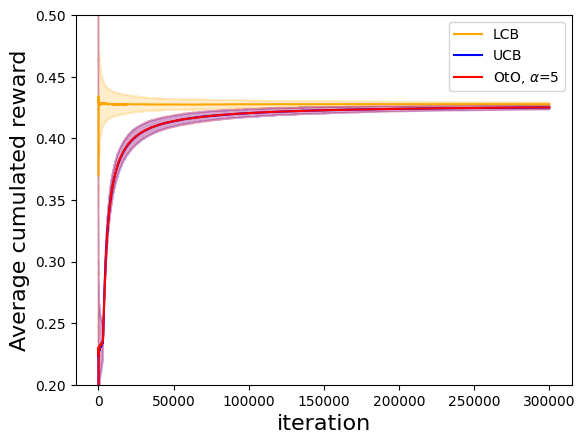

In [20]:
plot_average_reward_confidence_interval(hist_LCB6,color="orange", label="LCB")
plot_average_reward_confidence_interval(hist_UCB6,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO6,color="red", label="OtO, "r"$\alpha$=5")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=100000, m=10000, alpha=2.5")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT100000alpha5.pdf', format='pdf')

# Show the plot
plt.show()

In [21]:
K=7
means = [0]*K
m=30000
T=3000
hist_UCB7 = hist_UCB1
hist_LCB7 = hist_LCB1
hist_OtO7=repeat_exp_real_data_oto(K,m,T,means,0,reward_table_bad, offline_data,alpha=0.2,n_exp=my_n_exp)


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 76.70it/s]


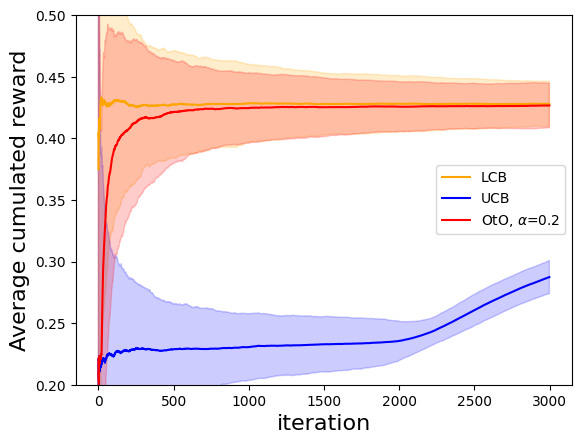

In [22]:
plot_average_reward_confidence_interval(hist_LCB7,color="orange", label="LCB")

plot_average_reward_confidence_interval(hist_UCB7,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO7,color="red", label="OtO, "r"$\alpha$=0.2")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=10000, m=10000, alpha=2.5")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT1000alpha0.3.pdf', format='pdf')

# Show the plot
plt.show()

In [23]:
K=7
means = [0]*K
m=30000
T=300000
hist_UCB8 = hist_UCB2
hist_LCB8 = hist_LCB2
hist_OtO8=repeat_exp_real_data_oto(K,m,T,means,0,reward_table_bad, offline_data,alpha=0.2,n_exp=my_n_exp)


100%|█████████████████████████████████████████| 200/200 [04:43<00:00,  1.42s/it]


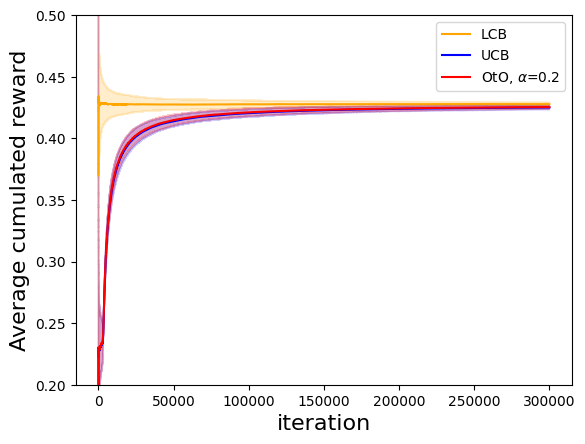

In [24]:
plot_average_reward_confidence_interval(hist_LCB8,color="orange", label="LCB")

plot_average_reward_confidence_interval(hist_UCB8,color="blue", label="UCB")
plot_average_reward_confidence_interval(hist_OtO8,color="red", label="OtO, "r"$\alpha$=0.2")

plt.xlabel("iteration",fontsize=16)
plt.ylabel("Average cumulated reward",fontsize=16)
#plt.title("T=10000, m=10000, alpha=0.3")
plt.legend()
# Save the plot as a PDF
plt.savefig('plots/goodT100000alpha0.3.pdf', format='pdf')

# Show the plot
plt.show()

In [25]:
emprirical_best_arm_T1000=[]
emprirical_best_arm_T100000=[]
for i in range(200):
    indices = np.random.randint(0, 299999, size=3000)
    off_data = [reward_table_bad[indices, 0]]
    emprirical_best_arm_T1000.append(np.sum(off_data))
    indices = np.random.randint(0, 299999, size=300000)
    off_data = [reward_table_bad[indices, 0]]
    emprirical_best_arm_T100000.append(np.sum(off_data))

In [26]:
validation_best_arm_T1000=[]
validation_best_arm_T100000=[]
for i in range(200):
    indices = np.random.randint(0, 299999, size=3000)
    off_data = [reward_table_bad[indices, 2]]
    validation_best_arm_T1000.append(np.sum(off_data))
    indices = np.random.randint(0, 299999, size=300000)
    off_data = [reward_table_bad[indices, 2]]
    validation_best_arm_T100000.append(np.sum(off_data))

In [27]:
import seaborn as sns

In [28]:
mean_val_best_arm= int(np.mean(validation_best_arm_T100000))

/var/folders/xw/7wc0bvcx05b7d6pnlj35kr69qhzjh1/T/ipykernel_69339/110275564.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Algorithm", y="Reward", data=data_long, palette=custom_colors)


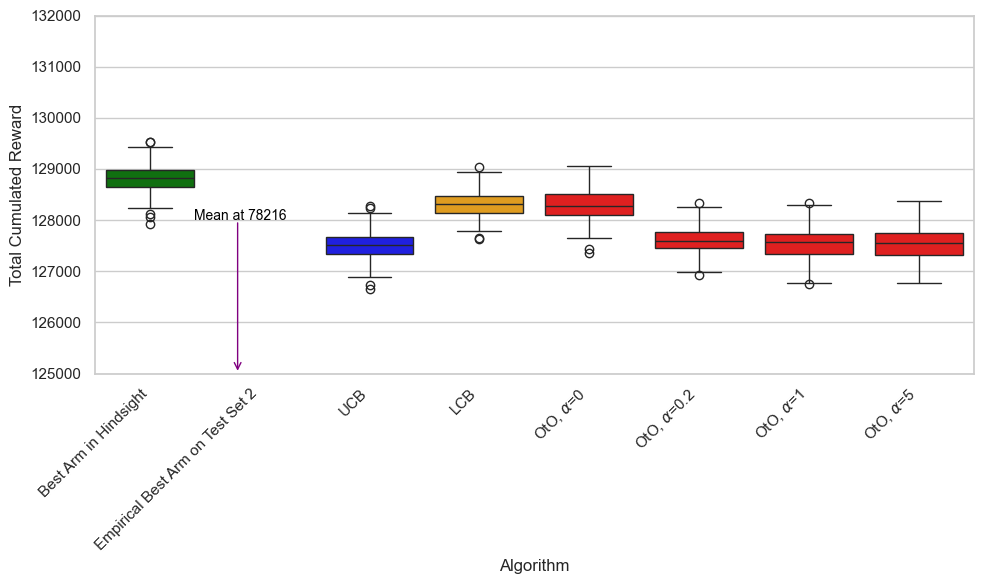

In [29]:
data_arrays = [emprirical_best_arm_T100000,validation_best_arm_T100000,np.array(hist_UCB2)[:,-1],np.array(hist_LCB2)[:,-1],np.array(hist_OtO4)[:,-1],np.array(hist_OtO8)[:,-1],np.array(hist_OtO2)[:,-1],np.array(hist_OtO6)[:,-1]]

group_labels = [
    "Best Arm in Hindsight",
    "Empirical Best Arm on Test Set 2",
    "UCB",
    "LCB",
    r"OtO, $\alpha$=0",
    r"OtO, $\alpha$=0.2",
    r"OtO, $\alpha$=1",
    r"OtO, $\alpha$=5"
]

# Create long-format DataFrame for Seaborn
data_long = pd.DataFrame({
    "Reward": np.concatenate(data_arrays),
    "Algorithm": np.repeat(group_labels, [len(arr) for arr in data_arrays])
})

# Define custom colors (one color per box)
custom_colors = ['green','purple', 'blue', 'orange', 'red', 'red', 'red', 'red']

# Create the box plot using Seaborn
sns.set(style="whitegrid")  # Optional: set a nice grid style
plt.figure(figsize=(10, 6))  # Optional: increase the size of the plot

# Create the boxplot
ax = sns.boxplot(x="Algorithm", y="Reward", data=data_long, palette=custom_colors)

# Customize the plot with title, axis labels, and rotations
#plt.title("Customized Box Plot for Multiple Groups")
plt.xlabel("Algorithm")
plt.ylabel("Total Cumulated Reward")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

ax.set_ylim(125000, 132000)  # Example: limit y-axis to range from -3 to 3

ax.annotate(
    '',  # The text label
    xy=(0.8, 125000),  # Coordinates of the second box plot ("Algorithm B")
    xytext=(0.8, 128000),  # Start the arrow from this point
    arrowprops=dict(color='purple', arrowstyle='->'),  # Customize arrow style and color
    fontsize=12,
    color='black'
)
ax.annotate(
    'Mean at '+str(mean_val_best_arm),  # The text label
    xy=(0.4, 128000),  # Coordinates of the second box plot ("Algorithm B")
    xytext=(0.4, 128000),  # Start the arrow from this point
    fontsize=10,
    color='black'
)
# Show the plot
plt.tight_layout()
plt.savefig('plots/onegoodarmT100000.pdf', format='pdf')

plt.show()


/var/folders/xw/7wc0bvcx05b7d6pnlj35kr69qhzjh1/T/ipykernel_69339/2937307080.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Algorithm", y="Reward", data=data_long, palette=custom_colors)


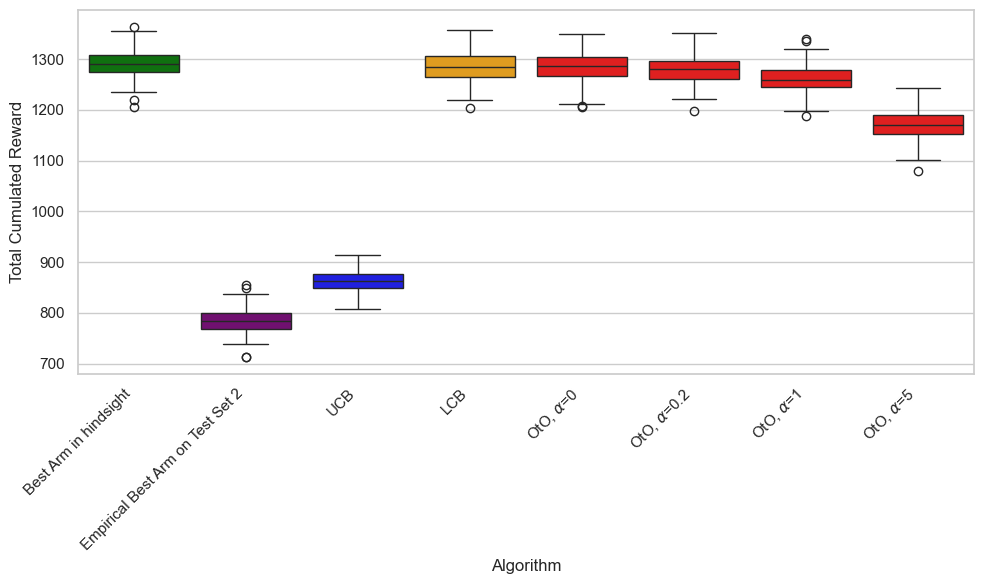

In [30]:
# Prepare data arrays and labels
data_arrays = [emprirical_best_arm_T1000,validation_best_arm_T1000,np.array(hist_UCB1)[:,-1],np.array(hist_LCB1)[:,-1],np.array(hist_OtO3)[:,-1],np.array(hist_OtO7)[:,-1],np.array(hist_OtO1)[:,-1],np.array(hist_OtO5)[:,-1]]

group_labels = [
    "Best Arm in hindsight",
    "Empirical Best Arm on Test Set 2",
    "UCB",
    "LCB",
    r"OtO, $\alpha$=0",
    r"OtO, $\alpha$=0.2",
    r"OtO, $\alpha$=1",
    r"OtO, $\alpha$=5"
]


# Create long-format DataFrame for Seaborn
data_long = pd.DataFrame({
    "Reward": np.concatenate(data_arrays),
    "Algorithm": np.repeat(group_labels, [len(arr) for arr in data_arrays])
})

# Define custom colors (one color per box)
custom_colors = ['green','purple', 'blue', 'orange', 'red', 'red', 'red', 'red']

# Create the box plot using Seaborn
sns.set(style="whitegrid")  # Optional: set a nice grid style
plt.figure(figsize=(10, 6))  # Optional: increase the size of the plot


# Create the boxplot
ax = sns.boxplot(x="Algorithm", y="Reward", data=data_long, palette=custom_colors)

# Customize the plot with title, axis labels, and rotations
#plt.title("Customized Box Plot for Multiple Groups")
plt.xlabel("Algorithm")
plt.ylabel("Total Cumulated Reward")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.savefig('plots/onegoodarmT1000.pdf', format='pdf')

plt.show()
